## AIRBNB'S PRICE PREDICTION

### PROBLEM STATEMENT:
    
The objective is to predict the rental prices of Airbnb listings based on various features of the properties and their hosts. Accurate predictions will help potential guests make informed decisions and assist hosts in setting competitive prices.

#### Scope: 
The dataset consists of Airbnb listings in New York City, including features such as location, property type, availability, host information, and review metrics.

#### Objective:
Develop a machine learning model that can accurately predict the price of an Airbnb listing using both numerical and categorical features. 

## 1: Importing Libraries

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     
%matplotlib inline
import seaborn as sns   
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')
    

## 2: Reading Data

In [110]:
df = pd.read_csv(' Add the csv file location.')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 3: Understanding Data

In [111]:
df.shape

(48895, 16)

In [112]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [113]:
#renaming columns for simpler and easy understanding
rename_col = {'id':'listing_id','name':'listing_name','number_of_reviews':'total_reviews',
              'calculated_host_listings_count':'host_listings_count'}

In [114]:
df = df.rename(columns = rename_col)

In [115]:
df.columns

Index(['listing_id', 'listing_name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'total_reviews', 'last_review',
       'reviews_per_month', 'host_listings_count', 'availability_365'],
      dtype='object')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listings_count  48895 non-null  int64  
 15  availability_365     48895 non-null 

In [117]:
#deleting duplicates if any
df = df.drop_duplicates()
df.count()

listing_id             48895
listing_name           48879
host_id                48895
host_name              48874
neighbourhood_group    48895
neighbourhood          48895
latitude               48895
longitude              48895
room_type              48895
price                  48895
minimum_nights         48895
total_reviews          48895
last_review            38843
reviews_per_month      38843
host_listings_count    48895
availability_365       48895
dtype: int64

### 3.1 Handling Missing values

In [118]:
df.isnull().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

In [119]:
(df.isnull().sum()/(len(df)))*100

listing_id              0.000000
listing_name            0.032723
host_id                 0.000000
host_name               0.042949
neighbourhood_group     0.000000
neighbourhood           0.000000
latitude                0.000000
longitude               0.000000
room_type               0.000000
price                   0.000000
minimum_nights          0.000000
total_reviews           0.000000
last_review            20.558339
reviews_per_month      20.558339
host_listings_count     0.000000
availability_365        0.000000
dtype: float64

In [120]:
#filling missing values
df['listing_name'] = df['listing_name'].fillna('unknown')
df['host_name'] = df['host_name'].fillna('no name')
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

#removing last_review column
df = df.drop(['last_review'], axis=1)     

In [121]:
df.isnull().sum()

listing_id             0
listing_name           0
host_id                0
host_name              0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
total_reviews          0
reviews_per_month      0
host_listings_count    0
availability_365       0
dtype: int64

In [122]:
df.nunique()

listing_id             48895
listing_name           47906
host_id                37457
host_name              11453
neighbourhood_group        5
neighbourhood            221
latitude               19048
longitude              14718
room_type                  3
price                    674
minimum_nights           109
total_reviews            394
reviews_per_month        938
host_listings_count       47
availability_365         366
dtype: int64

## 4. Exploratory Data Analysis - EDA

In [123]:
df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### 4.1 FEATURE INFORMATION:

1. listing_id: Unique identifier for each listing.
2. listing_name: Name of the listing.
3. host_id: Unique identifier for each host.
4. host_name: Name of the host.
5. neighbourhood_group: Grouping of neighborhoods.
6. neighbourhood: Specific neighborhood where the listing is located.
7. latitude: Latitude coordinate of the listing.
8. longitude: Longitude coordinate of the listing.
9. room_type: Type of room offered in the listing (entire home/apartment, private room, shared room).
10. price: Price of the listing per night.
11. minimum_nights: Minimum number of nights required for booking.
12. total_reviews: Total number of reviews received for the listing.
13. reviews_per_month: Average number of reviews received per month.
14. host_listings_count: Total number of listings the host has.
15. availability_365: Number of days the listing is available for booking in a year.

In [124]:
categorical_vars = df.select_dtypes(include=['object']).columns
numerical_vars = df.select_dtypes(include=['float64', 'int64']).columns

print("Categorical variables:")
print(categorical_vars)

print("\nNumerical variables:")
print(numerical_vars)

Categorical variables:
Index(['listing_name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type'],
      dtype='object')

Numerical variables:
Index(['listing_id', 'host_id', 'latitude', 'longitude', 'price',
       'minimum_nights', 'total_reviews', 'reviews_per_month',
       'host_listings_count', 'availability_365'],
      dtype='object')


In [125]:
#summary of the dataset
df.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [126]:
# Outlier Analysis for 'price':
# Prices contain outliers, which are extreme values that significantly deviate from manjority of the data as they 
# may distort statistical results and modeling.
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<Axes: xlabel='price'>

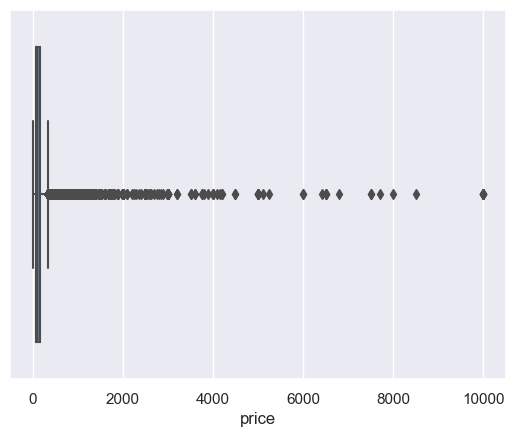

In [127]:
sns.boxplot( x  = df['price'])

In [128]:
# Interquartile range (IQR) for the 'price' column
Q3 = df['price'].describe()['75%']
Q1 = df['price'].describe()['25%']
iqr = Q3 - Q1

# Calculating upper and lower limits for outliers
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr

print(upper_limit)
print(lower_limit)

334.0
-90.0


In [129]:
# filtering the DataFrame to exclude rows where the price is either below the lower limit or above the upper limit
df = df[(df['price'] < upper_limit) & (df['price'] > lower_limit )]
df.shape

(45918, 15)

In [130]:
df.describe()['price']

count    45918.000000
mean       119.947014
std         68.117249
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        333.000000
Name: price, dtype: float64

<Axes: xlabel='price'>

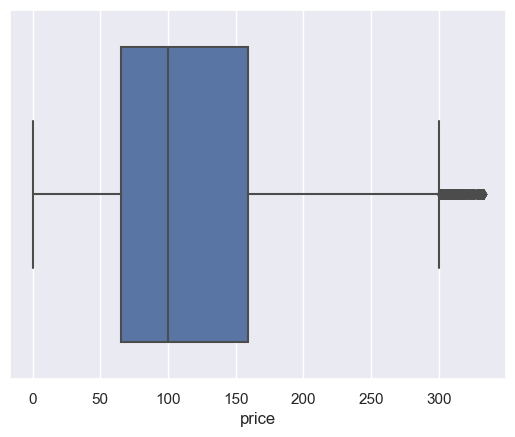

In [131]:
sns.boxplot( x  = df['price'])

### 4.2 DATA VISUALISATION 

### 4.3 Univariate Analysis

Text(0.5, 1.0, 'Distribution of Prices')

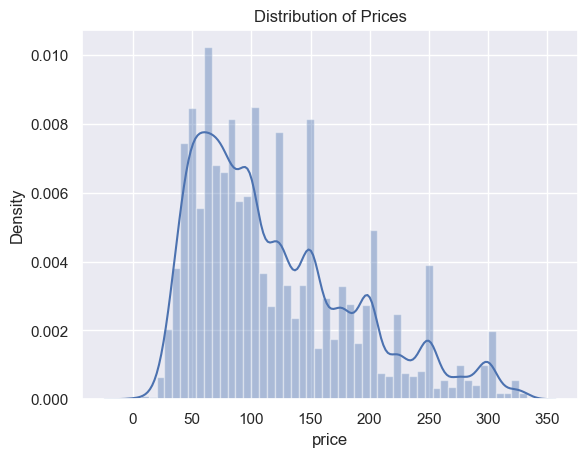

In [132]:
# distribution plot of the 'price' column
sns.set_theme(style='darkgrid')
sns.distplot(df["price"])
plt.title('Distribution of Prices')

<Axes: xlabel='neighbourhood_group'>

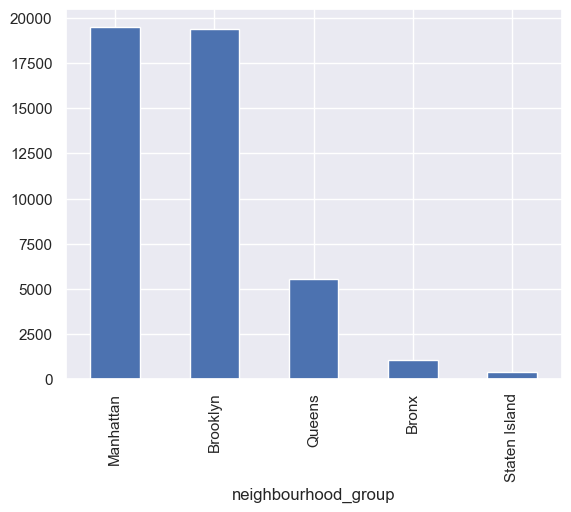

In [133]:
# Bookings based on neighbourhood group
count_neighbourhood_group = df['neighbourhood_group'].value_counts()
count_neighbourhood_group.plot.bar()

Text(0.5, 1.0, 'Distribution of Listings Among Host Names')

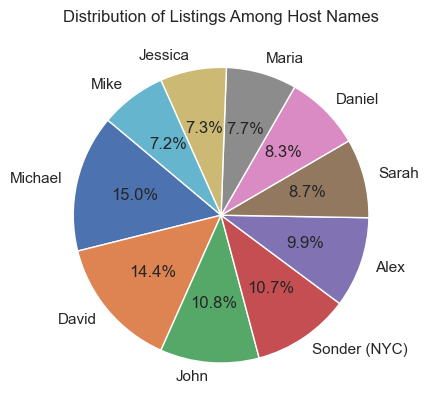

In [134]:
# top 10 host names with the most listings
top_host_names = df['host_name'].value_counts().nlargest(10)

# Plotting a pie chart to visualize the distribution of listings among top host names
plt.pie(top_host_names, labels=top_host_names.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Listings Among Host Names')


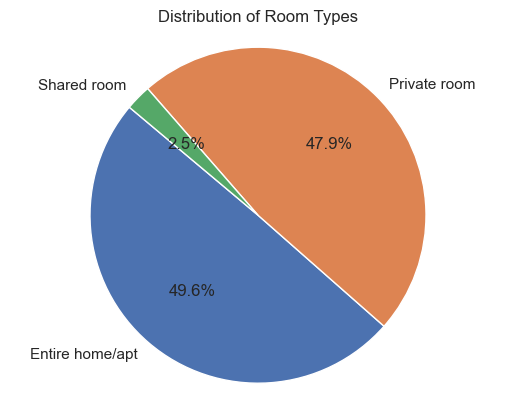

In [135]:
room_type_counts = df['room_type'].value_counts()
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Room Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Text(0, 0.5, 'Number of Listings')

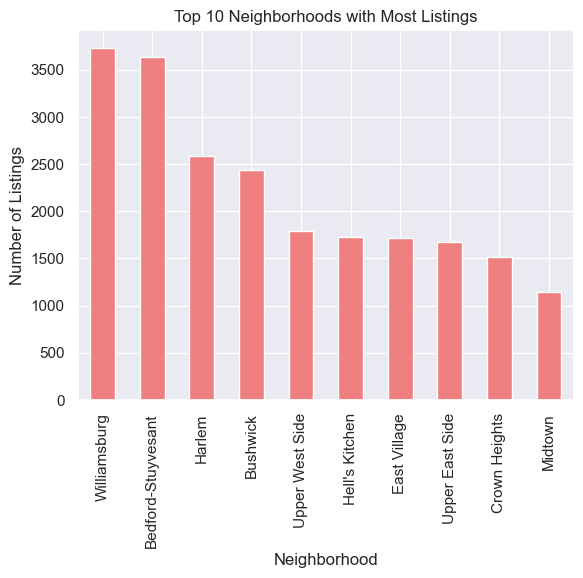

In [136]:
top_neighbourhood_names = df['neighbourhood'].value_counts().nlargest(10)

# Plot a bar chart to visualize the distribution of listings among top neighborhoods
# This chart displays the number of listings in each of the top neighborhoods.
top_neighbourhood_names.plot(kind='bar',color='lightcoral')

# Add title and labels
plt.title('Top 10 Neighborhoods with Most Listings')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')

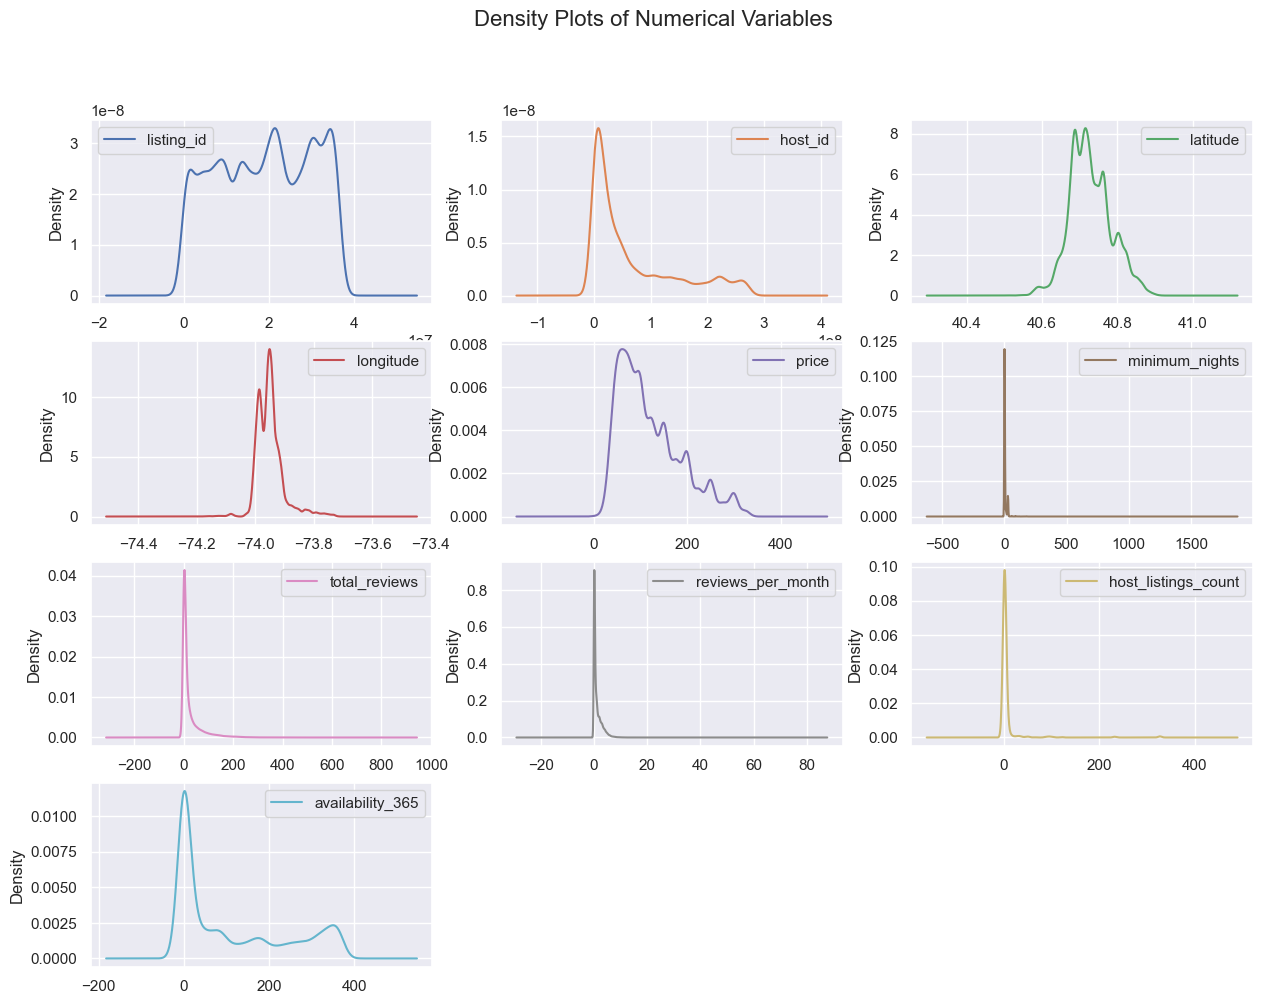

In [137]:
## Proportion of count data on numerical columns
   
df.plot(kind='density', subplots=True, layout=(4, 3), sharex=False, figsize=(15, 11))
plt.suptitle("Density Plots of Numerical Variables", fontsize=16)
plt.show()

listing_id: The density appears highest around the mean value, indicating a relatively uniform distribution of listing IDs.

host_id: Similar to listing_id, the density peaks around the mean value, suggesting a uniform distribution of host IDs.

latitude: The distribution appears to follow a normal distribution, with the highest density around the mean latitude value.

longitude: Similar to latitude, the distribution seems to follow a normal distribution with the highest density around the mean longitude value.

price: The density is highest around the mean price value, indicating a concentration of listings around this price range.

minimum_nights: The density is highest at lower values, suggesting that most listings have a relatively low minimum nights requirement.

total_reviews: The density is highest at lower values, indicating that many listings have a low total number of reviews.

reviews_per_month: Similar to total_reviews, the density peaks at lower values, suggesting that most listings receive a low number of reviews per month.

host_listings_count: The density is highest around the mean value, indicating a concentration of hosts with a similar number of listings.

availability_365: The density appears highest around the mean availability value, suggesting a concentration of listings with similar availability throughout the year.


In [138]:
df.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
count,4.591800e+04,4.591800e+04,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000
mean,1.889785e+07,6.632478e+07,40.728487,-73.950728,119.947014,6.935973,23.944945,1.107847,6.620193,109.359358
std,1.091889e+07,7.756044e+07,0.055334,0.046471,68.117249,19.857728,45.317122,1.612711,30.938400,130.272996
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.436114e+06,7.722615e+06,40.689230,-73.981920,65.000000,1.000000,1.000000,0.050000,1.000000,0.000000
50%,1.952542e+07,3.028359e+07,40.721770,-73.954360,100.000000,2.000000,5.000000,0.380000,1.000000,39.000000
75%,2.891184e+07,1.054798e+08,40.763390,-73.934310,159.000000,5.000000,24.000000,1.620000,2.000000,216.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,333.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### 4.4 Bivariate Analysis

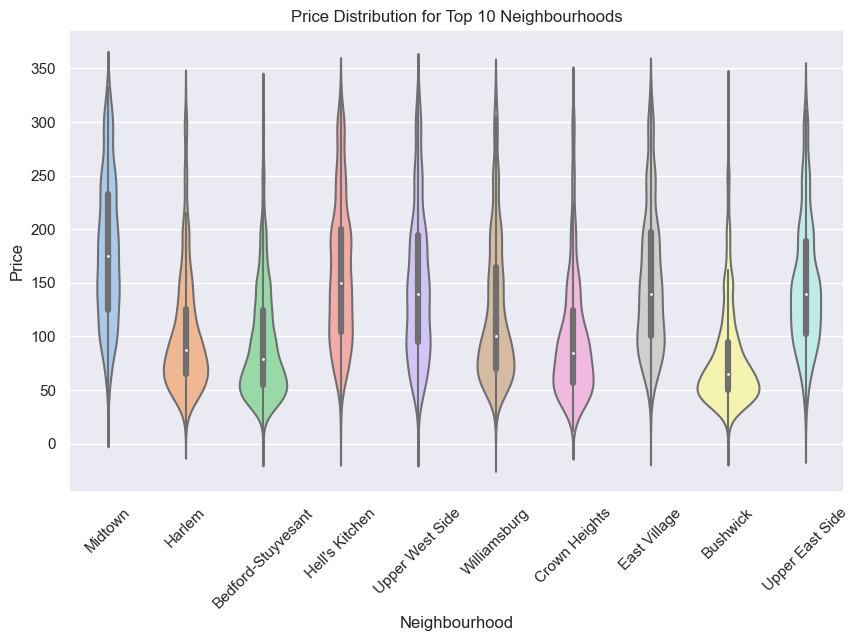

In [139]:
top_10_neighbourhoods = df['neighbourhood'].value_counts().nlargest(10).index

# Filter the DataFrame to include only listings from the top 10 neighbourhoods
filtered_df = df[df['neighbourhood'].isin(top_10_neighbourhoods)]
# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='neighbourhood', y='price', data=filtered_df, palette='pastel')
plt.title('Price Distribution for Top 10 Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Observation :

This plot represents a comparision between listing prices across the top 10 neighborhoods, offering insights into price variations and trends.

In [140]:
neighbourhood_group_avg_price = df.groupby("neighbourhood_group")['price'].mean().round(2).reset_index(name='avg_price')
neighbourhood_group_avg_price

,neighbourhood_group,avg_price
0,Bronx,77.37
1,Brooklyn,105.70
2,Manhattan,145.90
3,Queens,88.90
4,Staten Island,89.24


<Axes: xlabel='neighbourhood_group', ylabel='avg_price'>

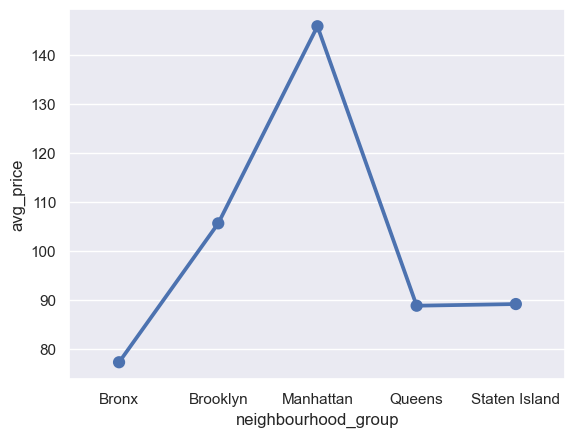

In [141]:
# average price of listings across different neighborhood groups.
sns.pointplot(data=neighbourhood_group_avg_price, x="neighbourhood_group", y="avg_price")

Observation :

Average price vs Neighborhood group

- Manhattan has the highest average listing price among the neighborhood groups, with an average price of 145.90
- Brooklyn follows with an average listing price of 105.70
- Listings in Staten Island have the next highest average price at 89.24
- Queens has a slightly lower average price compared to Staten Island, with listings averaging at 88.90
- The Bronx has the lowest average listing price among the neighborhood groups, with listings averaging at 77.37

In [142]:
# average price for each neighborhood and selecting the top 25 neighborhoods with the highest average prices
neigh_avg_price = df.groupby('neighbourhood')['price'].mean().nlargest(25)

# Dropping duplicate neighbourhood group column
neighbourhood_avg_price_sorted_with_group = neigh_avg_price.reset_index().merge(
    df[['neighbourhood', 'neighbourhood_group']].drop_duplicates(),
    on='neighbourhood',
    how='left'
)
print(neighbourhood_avg_price_sorted_with_group)


         neighbourhood       price neighbourhood_group
0          Willowbrook  249.000000       Staten Island
1             Neponsit  237.000000              Queens
2         Breezy Point  213.333333              Queens
3              Tribeca  212.495327           Manhattan
4                 NoHo  205.290909           Manhattan
5         West Village  192.901235           Manhattan
6    Flatiron District  188.090909           Manhattan
7   Financial District  183.973926           Manhattan
8              Midtown  180.948381           Manhattan
9    Greenwich Village  179.853372           Manhattan
10          Mill Basin  179.750000            Brooklyn
11         Murray Hill  179.559719           Manhattan
12             Chelsea  178.653319           Manhattan
13    Theater District  176.380165           Manhattan
14               DUMBO  174.750000            Brooklyn
15              Nolita  169.048889           Manhattan
16   Battery Park City  166.118644           Manhattan
17        

In [143]:
df.nunique()

listing_id             45918
listing_name           44988
host_id                35388
host_name              11009
neighbourhood_group        5
neighbourhood            219
latitude               18759
longitude              14534
room_type                  3
price                    321
minimum_nights           105
total_reviews            393
reviews_per_month        937
host_listings_count       47
availability_365         366
dtype: int64

<Figure size 1200x600 with 0 Axes>

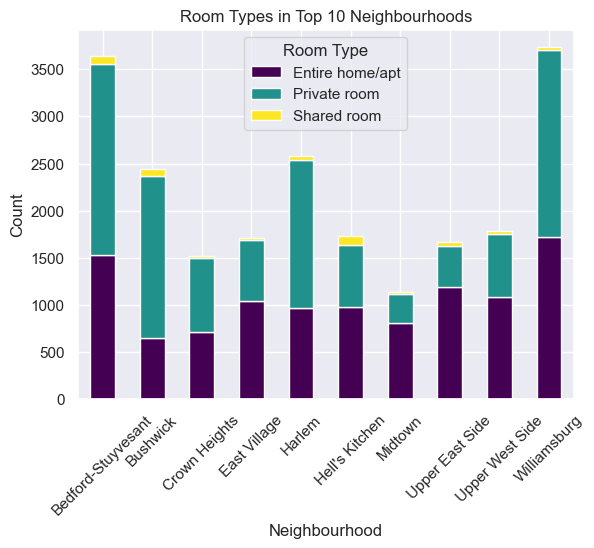

In [144]:
# top 10 neighborhoods based on the number of listings
top_10_neighbourhoods = df['neighbourhood'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 neighbourhoods
df_top_10 = df[df['neighbourhood'].isin(top_10_neighbourhoods)]

# Creating a cross-tabulation of room type counts by neighbourhood
room_type_counts = pd.crosstab(df_top_10['neighbourhood'], df_top_10['room_type'])

plt.figure(figsize=(12, 6))
room_type_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Room Types in Top 10 Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()

The plot illustrates the distribution of room types (entire home/apt, private room, and shared room) across the top 10 neighborhoods with the highest number of listings.

- Bedford-Stuyvesant: This neighborhood has a higher number of private rooms compared to entire home/apartment listings, indicating a preference for shared accommodations.
- Bushwick: Has a significant number of private rooms, although entire home/apartment listings are more prevalent here.
- Crown Heights: This neighborhood has a relatively balanced distribution of entire home/apartment listings and private rooms, with a smaller number of shared rooms.
- East Village: Entire home/apartment listings are dominant in East Village, followed by private rooms, with a minimal number of shared rooms.
- Harlem: Private rooms outnumber entire home/apartment listings in Harlem, suggesting a preference for shared accommodations.
- Hell's Kitchen: Entire home/apartment listings and private rooms are relatively evenly distributed in Hell's Kitchen, with a notable number of shared rooms as well.
- Midtown: Entire home/apartment listings are more common in Midtown, followed by private rooms, while shared rooms are less prevalent.
- Upper East Side: The Upper East Side has a higher number of entire home/apartment listings compared to private rooms and shared rooms.
- Upper West Side: Similar to the Upper East Side, the Upper West Side also has a higher number of entire home/apartment listings, followed by private rooms and shared rooms.
- Williamsburg: Entire home/apartment listings and private rooms are nearly evenly distributed in Williamsburg, with a small number of shared rooms.


Text(0.5, 1.0, 'Distribution of Prices Across Room Types')

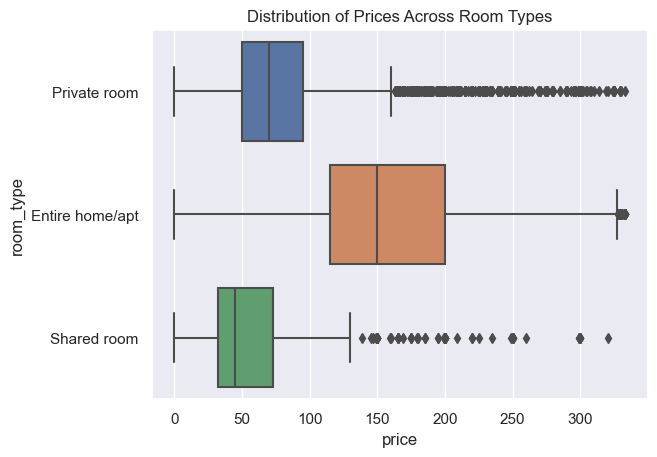

In [145]:
sns.boxplot(data=df, x="price", y="room_type")
plt.title('Distribution of Prices Across Room Types')

<Axes: xlabel='neighbourhood_group', ylabel='count'>

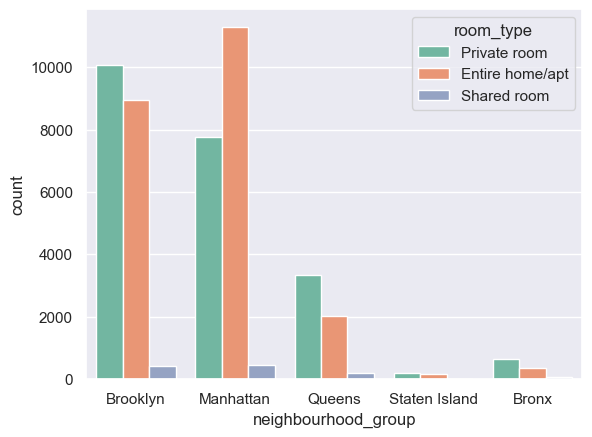

In [146]:
sns.countplot(data=df, x='neighbourhood_group', hue='room_type', palette='Set2')

This visualization helps in understanding the popularity and distribution of different types of accommodations across various neighbourhood groups in New York City.

1. Manhattan and Brooklyn are the most popular neighbourhoods for Airbnb listings, especially for Entire home/apts and Private rooms.
2. There are distinct preferences for room types within each neighbourhood group, which can inform potential hosts about the demand trends in different areas.

### 4.5 Multivariate Analysis

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bedford-Stuyvesant'),
  Text(1, 0, 'Bushwick'),
  Text(2, 0, 'Crown Heights'),
  Text(3, 0, 'East Village'),
  Text(4, 0, 'Harlem'),
  Text(5, 0, "Hell's Kitchen"),
  Text(6, 0, 'Midtown'),
  Text(7, 0, 'Upper East Side'),
  Text(8, 0, 'Upper West Side'),
  Text(9, 0, 'Williamsburg')])

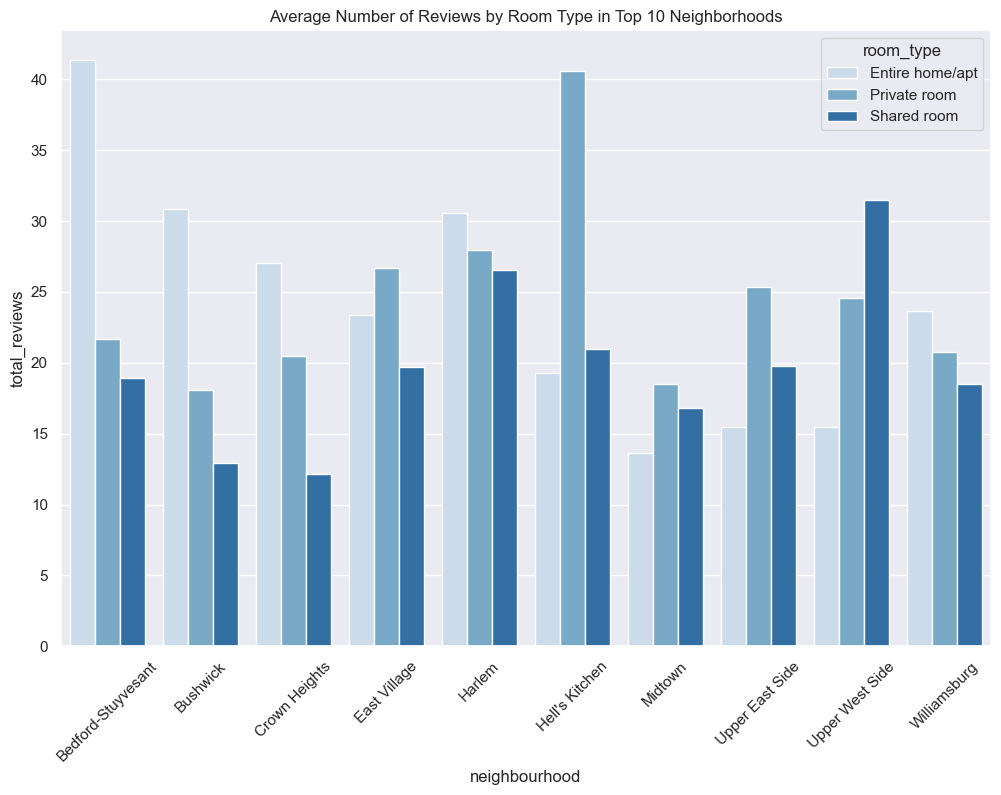

In [147]:
# Filter the DataFrame to include only the top 10 neighborhoods
top_neighborhoods = df['neighbourhood'].value_counts().nlargest(10).index
df_top_neighborhoods= df[df['neighbourhood'].isin(top_neighborhoods)]

# Calculate the average number of reviews for each room type in the top 10 neighborhoods
avg_reviews_by_room_type = df_top_neighborhoods.groupby(['neighbourhood', 'room_type'])['total_reviews'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_reviews_by_room_type, x='neighbourhood', y='total_reviews', hue='room_type', palette='Blues')
plt.title('Average Number of Reviews by Room Type in Top 10 Neighborhoods')
plt.xticks(rotation=45)

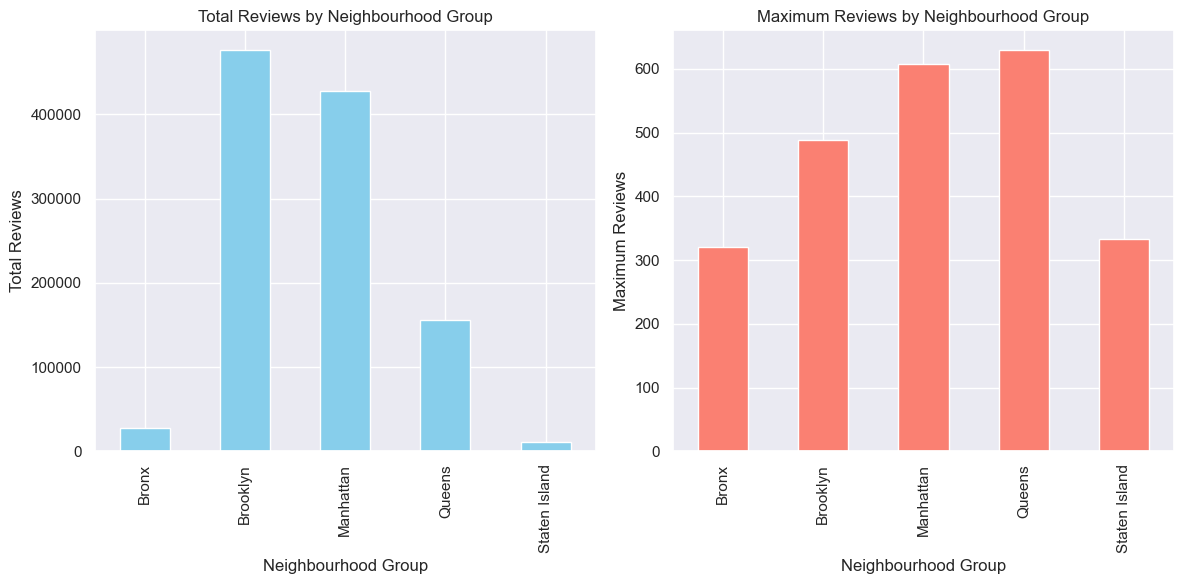

In [148]:
total_reviews = df.groupby('neighbourhood_group')['total_reviews'].sum()

# Calculate the maximum number of reviews for each neighbourhood_group
max_reviews = df.groupby('neighbourhood_group')['total_reviews'].max()

# Plotting
plt.figure(figsize=(12, 6))

# Plot total reviews
plt.subplot(1, 2, 1)
total_reviews.plot(kind='bar', color='skyblue')
plt.title('Total Reviews by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total Reviews')

# Plot maximum reviews
plt.subplot(1, 2, 2)
max_reviews.plot(kind='bar', color='salmon')
plt.title('Maximum Reviews by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Maximum Reviews')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Geographical Distribution of Listings by Neighbourhood Group')

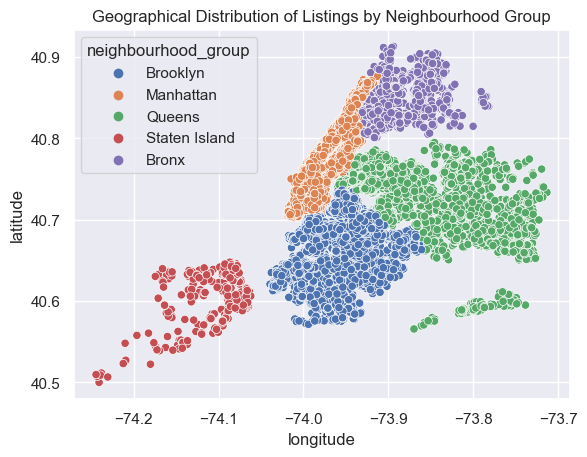

In [149]:
sns.scatterplot(data=df, x="longitude", y="latitude", hue='neighbourhood_group')
plt.title('Geographical Distribution of Listings by Neighbourhood Group')


The plot shows the longitude and latitude coordinates of Airbnb listings, highlighting their geographical spread.
Neighbourhood Groups:

1. Manhattan: High density of listings concentrated in a relatively small area, indicating its popularity.
2. Brooklyn: Widespread listings, showing a significant number of Airbnb options across the borough.
3. Queens: Listings are more spread out compared to Manhattan and Brooklyn.
4. Bronx and Staten Island: Fewer listings, indicating less Airbnb activity compared to other boroughs.

Text(0.5, 1.0, 'Geographical Distribution of Listings by Room Type')

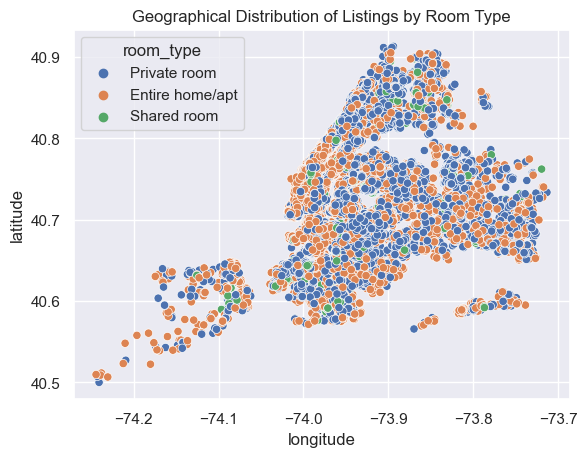

In [150]:
sns.scatterplot(data=df, x="longitude", y="latitude", hue='room_type')
plt.title('Geographical Distribution of Listings by Room Type')


1. Entire home/apt: Often found in high-density areas, particularly in Manhattan and Brooklyn, reflecting the popularity of this room type.
2. Private room: Widely distributed across the city, showing significant presence in both dense urban areas and more residential neighborhoods.
3. Shared room: Less common, with fewer listings spread across various neighborhoods.

Text(0.5, 1.0, 'Geographical Distribution of Listings by Price')

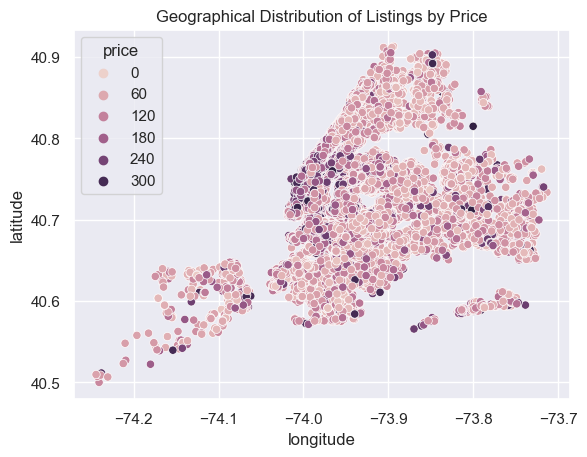

In [151]:
sns.scatterplot(data=df, x="longitude", y="latitude", hue='price')
plt.title('Geographical Distribution of Listings by Price')


<Axes: title={'center': 'Average Airbnb Reviews by Neighborhoods in New York City'}, xlabel='longitude', ylabel='latitude'>

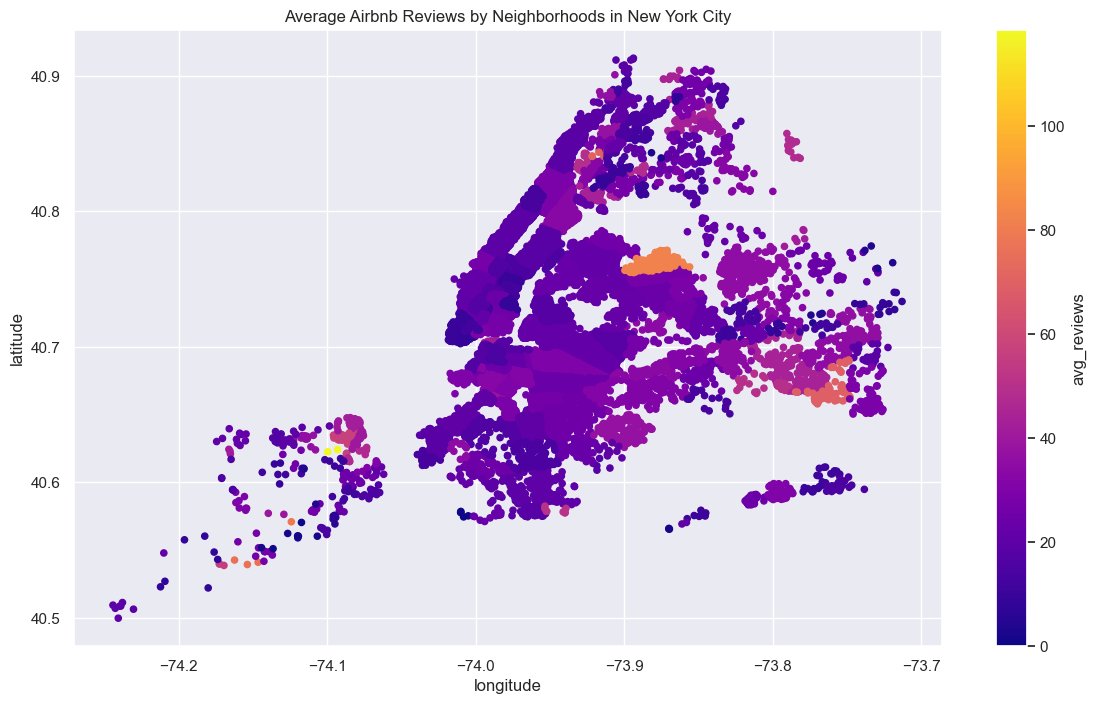

In [152]:
neighbourhood_avg_reviews = df.groupby("neighbourhood")["total_reviews"].mean()

# Create a new DataFrame with the average number of reviews for each neighborhood
neighbourhood_reviews = pd.DataFrame({"neighbourhood": neighbourhood_avg_reviews.index, "avg_reviews": neighbourhood_avg_reviews.values})

# Merge the average number of reviews data with the original DataFrame
df = df.merge(neighbourhood_reviews, on="neighbourhood")

# Create the scattermapbox plot
df.plot.scatter(x="longitude", y="latitude", c="avg_reviews", title="Average Airbnb Reviews by Neighborhoods in New York City", figsize=(14,8), cmap="plasma")



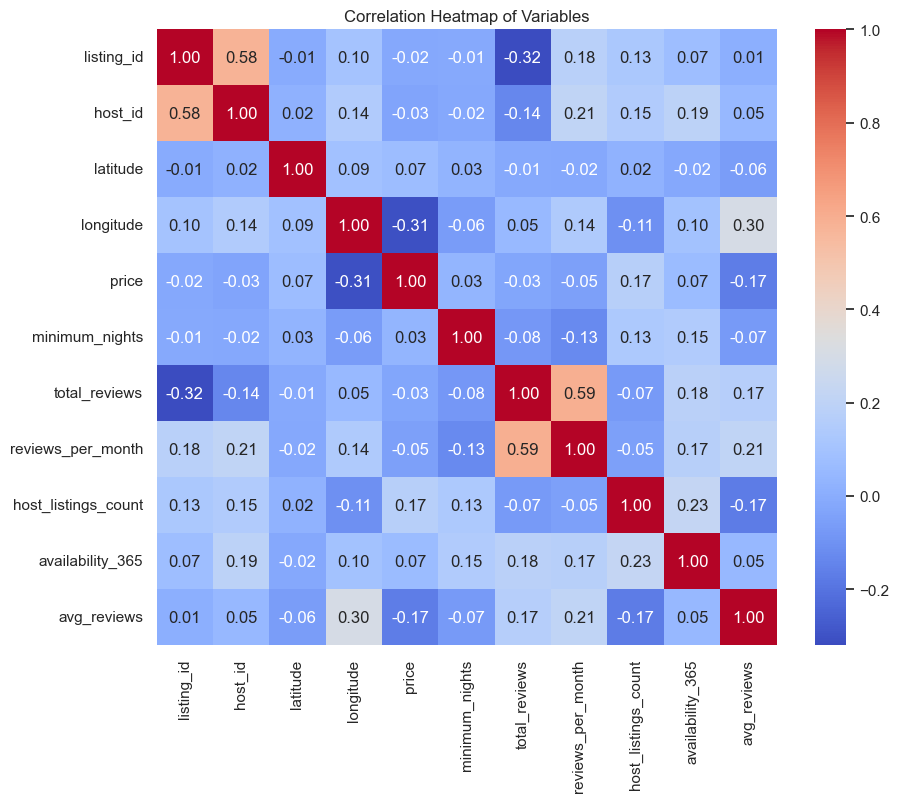

In [153]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Variables')
plt.show()

Positive Correlations:
1. Host Listings Count and Price (correlation coefficient: 0.17): Hosts with more listings tend to set higher prices.
2. Latitude and Price (correlation coefficient: 0.07): Listings further north tend to have higher prices.


Negative Correlations:
1. Longitude and Price (correlation coefficient: -0.31): Listings further west tend to have lower prices.
2. Total Reviews and Price (correlation coefficient: -0.03): Listings with more reviews tend to have slightly lower prices.

## 5. Model Training and Evaluation

This section deals with training a model to predict Airbnb listing prices using relevant features such as location, property type, and availability, and then evaluate how well it performs in making accurate price predictions for these listings. This process is vital for ensuring that the model can provide valuable insights to both hosts and guests in the Airbnb ecosystem.


### 5.1 
The below code trains a Linear Regression model to predict the prices of listings based on numerical features such as latitude, longitude, minimum nights, and availability throughout the year. The model's performance is evaluated using RMSE, providing insight into the accuracy of its price predictions.

In [154]:
# Numerical variables
# Split the data into features (X) and target variable (y)
X = df[['latitude', 'longitude', 'minimum_nights', 'availability_365']]  # Features
y = df['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiation of model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 63.89015315659992


Result : The model achieves a Root Mean Squared Error (RMSE) of approximately 63.89. This indicates that, on average, the model's predictions deviate by approximately $63.89 from the actual listing prices. Lower RMSE values would signify better predictive accuracy.

### 5.2 
Linear Regression model to predict prices of listings based on both categorical and numerical features.

In [155]:
# 1. The features include a combination of both categorical and numerical variables:
# - Categorical Variables: 'neighbourhood_group', 'neighbourhood', 'room_type'
# - Numerical Variables: 'latitude', 'longitude', 'minimum_nights', 'total_reviews', 'reviews_per_month', 'host_listings_count', 'availability_365'

X = df[['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'total_reviews', 'reviews_per_month', 'host_listings_count', 'availability_365']]
y = df['price']

# 2. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']
numerical_features = X.columns.difference(categorical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# 3. Model Building
# Baseline model - Linear Regression
baseline_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

# 4. Model Evaluation
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

print("Baseline Model - Linear Regression")
print("Mean Absolute Error:", mae_baseline)
print("Root Mean Squared Error:", rmse_baseline)
print("R² Score:", r2_baseline)

Baseline Model - Linear Regression
Mean Absolute Error: 34.31538134419679
Root Mean Squared Error: 46.91341723903888
R² Score: 0.5237728540716815


The baseline Linear Regression model, utilizing a combination of categorical and numerical features, achieves the following performance metrics:

1. Mean Absolute Error (MAE): 34.32
2. Root Mean Squared Error (RMSE): 46.91
3. R² Score: 0.524

These results indicate moderate predictive accuracy, with room for potential improvement through further refinement.

In [156]:
# Model - Random Forest Regression
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression")
print("Mean Absolute Error:", mae_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R² Score:", r2_rf)


Random Forest Regression
Mean Absolute Error: 31.712666412601628
Root Mean Squared Error: 44.165324681551425
R² Score: 0.5779315737496258


These metrics indicate improved predictive accuracy compared to the baseline Linear Regression model. The Random Forest Regression model demonstrates lower errors and a higher R² score, suggesting a better fit to the data. Overall, Random Forest Regression appears to be a promising approach for predicting Airbnb listing prices.

### 5.3 Model Optimization

In [157]:

param_distributions = {
    'regressor__n_estimators': randint(100, 200),
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': randint(2, 10),
    'regressor__min_samples_leaf': randint(1, 4),
    'regressor__max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(rf_model, param_distributions, n_iter=50, cv=3, scoring='neg_mean_absolute_error', random_state=42, n_jobs=-1)


In [158]:
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['availability_365', 'host_listings_count', 'latitude', 'longitude',
       'minimum_nights', 'reviews_per_month', 'total_reviews'],
      dtype='object')),
                                                                              ('cat',
                                                                               OneHo...
                                        'regressor__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15e0c7ed0>,
                                        'regressor__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15ddc9ad0>,
                                        'regressor__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15d04cd10>},
                   random_state=42, scoring='neg_mean_absolute_error')

In [159]:

# Get the best model from random search
best_rf_model = random_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Model Evaluation
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))

r2_best_rf = r2_score(y_test, y_pred_best_rf)
print("\nOptimized Random Forest Regression")
print("\nBest Parameters:", random_search.best_params_)
print("\nMean Absolute Error:", mae_best_rf)
print("\nRoot Mean Squared Error:", mse_best_rf)
print("\nR² Score:", r2_best_rf)


Optimized Random Forest Regression

Best Parameters: {'regressor__max_depth': None, 'regressor__max_features': 'log2', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 3, 'regressor__n_estimators': 101}

Mean Absolute Error: 31.6658741047932

Root Mean Squared Error: 44.01249280627177

R² Score: 0.5808476125432482


These results show slight improvements over the previous Random Forest Regression model, indicating that the optimization process has enhanced the model's predictive accuracy

### 5.4 Model Evaluation

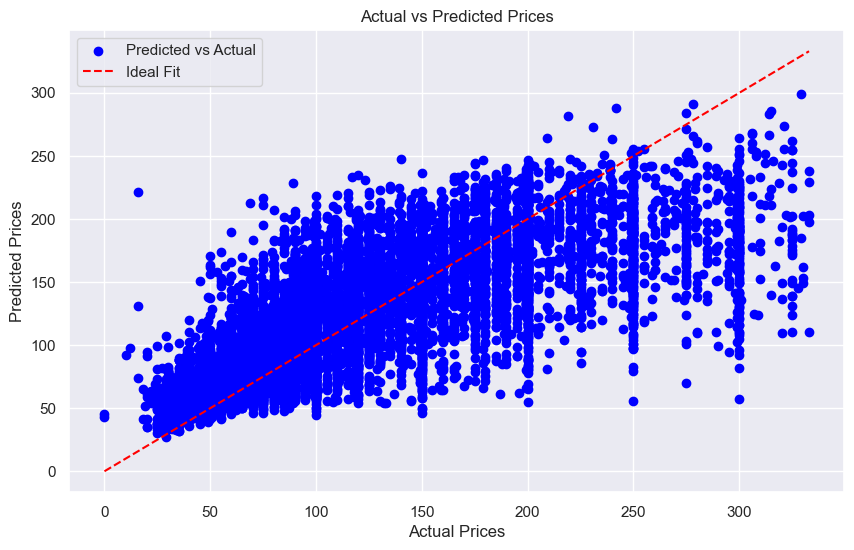

In [160]:
# 5. Evaluation of Models
# Plot actual vs predicted prices for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

The plot visualize the performance of the best model by plotting the actual prices against the predicted prices.

It illustrates the comparison between the actual prices and the predicted prices generated by the optimized Random Forest Regression model.

## 6. CONCLUSION:

### Findings -

1. Predictive Accuracy: The optimized Random Forest Regression model outperforms the baseline Linear Regression model, with lower MAE and RMSE, indicating better accuracy in predicting Airbnb listing prices.
2. Feature Importance: Numerical features like latitude and longitude are significant, and categorical features such as neighborhood group and room type also contribute to the model's predictive power.

### Limitations -

1. Data Quality: The accuracy of predictions may be affected by erroneous data in the dataset.
2. Feature Engineering: The current features may not fully capture all factors influencing prices, suggesting the need for further feature engineering.

### Future Model Performance Improvement -

1. Feature Selection: Refining and selecting the most relevant features can improve performance, guided by feature importance analysis and domain knowledge.
2. Model Optimization: Exploring alternative algorithms and hyperparameter tuning techniques like grid search or Bayesian optimization can enhance accuracy.
3. Ensemble Methods: Using ensemble methods such as stacking or boosting can further improve predictive performance.

### Conclusion - 
The optimized Random Forest Regression model shows promise in accurately predicting Airbnb listing prices. Despite improvements, further enhancement is possible through better feature engineering, model optimization, and advanced modeling techniques, leading to more reliable insights for Airbnb hosts and guests.